# Akar Yakıt Verilerinin Yüklenmesi

In [1]:
import pandas as pd
import folium

In [2]:
fiyatlar= pd.read_excel(r"C:\Users\LENOVO\Desktop\STAJ\Benzin_fiyat_buyuksehirler_before_after.xlsx")
fiyatlar.head()

,Enlem,Boylam,Sehir,Fiyat_Once,Fiyat_Sonra
0,37.000000,35.321333,Adana,7.10,5.58
1,39.920770,32.854110,Ankara,7.10,5.71
2,36.884140,30.705630,Antalya,7.14,5.79
3,37.856041,27.841631,Aydın,7.07,5.74
4,39.648369,27.882610,Balıkesir,7.07,5.75


## Kovid Öncesi Akaryakıt Fiyatları

* Kovid öncesi 2019-07-01 tarihine ait büyük şehirlerde benzin fiyatlarını göreceğiz.

In [3]:
m = folium.Map(
    location=[38.73122,35.478729],
    zoom_start=6.4982,
    tiles='OpenStreetMap'
)

for i in range(0,len(fiyatlar)):
    folium.Marker([fiyatlar["Enlem"][i], fiyatlar["Boylam"][i]], popup=str(fiyatlar["Sehir"][i])+' AKAR-YAKIT', tooltip=fiyatlar["Fiyat_Once"][i],draggable=True,icon=folium.Icon(color='red', icon='info-sign')).add_to(m)
m.get_root().html.add_child(folium.Element("<h1><center>BEFORE COVID OIL PRICESES 2019-07-01<center></h3>"))
m

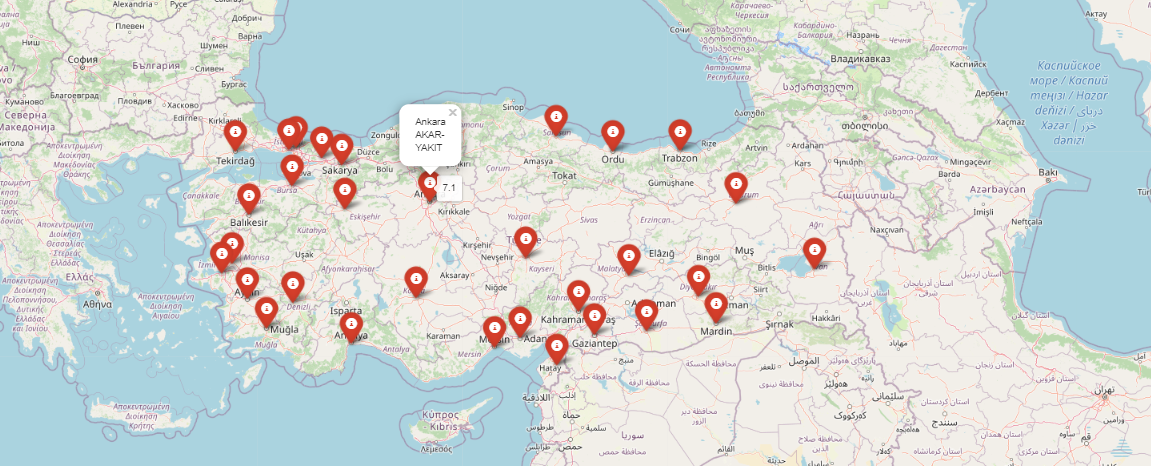

In [16]:
# Github Foilum Kütüphanesinin görselini desteklemediği için Screen Shot koyduk

from IPython.display import display, Image
display(Image(filename='Akaryakıt_önce.png'))

* Kovid öncesinde gözlemlenen benzin fiyatları genel olarak 7 Türk Lirası gözükmektedir.

## Kovid Sonrası Akaryakıt Fiyatları

* Kovid öncesi fiyatları görmüştük şimdi de kovid sonrası aynı şehirlerdeki fiyatları göreceğiz.

In [4]:
m = folium.Map(
    location=[38.73122,35.478729],
    zoom_start=6.4982,
    tiles='OpenStreetMap'
)

for i in range(0,len(fiyatlar)):
    folium.Marker([fiyatlar["Enlem"][i], fiyatlar["Boylam"][i]], popup=str(fiyatlar["Sehir"][i])+' AKAR-YAKIT', tooltip=fiyatlar["Fiyat_Sonra"][i],draggable=True,icon=folium.Icon(icon="info-sign",color="green")).add_to(m)
m.get_root().html.add_child(folium.Element("<h1><center>AFTER COVID OIL PRICESES 2020-05-01 <center></h3>"))

m

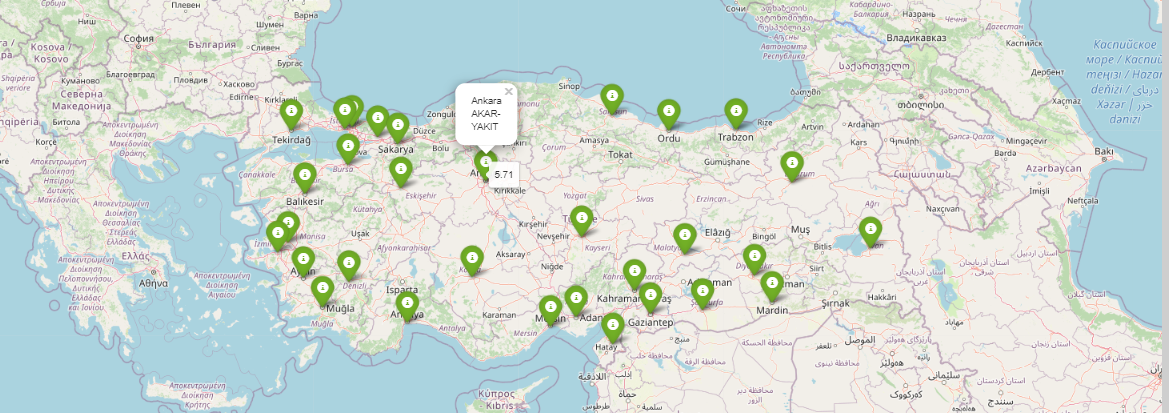

In [15]:
# Github Foilum Kütüphanesinin görselini desteklemediği için Screen Shot koyduk

from IPython.display import display, Image
display(Image(filename='Akaryakıt_sonra.png'))

* Kovid sonrası benzin fiyatların da yaklaşık olarak 2 birimlik düşüş görülmüştür.

* Tüm büyük şehirlerdeki rakamlar 5 ile 6 Türk Lirası arasındadır. 

## Kovid Sonrası Ve Öncesi Fiyatların Birlikte Gösterimi

* Kovid öncesi ve sonrasın da fiyatları yakından inceleyeceğiz.

In [5]:
m = folium.Map(
    location=[38.73122,35.478729],
    zoom_start=6.4982,
    tiles='OpenStreetMap'
)

for i in range(0,len(fiyatlar)):
    folium.Marker([fiyatlar["Enlem"][i], fiyatlar["Boylam"][i]], popup=str(fiyatlar["Sehir"][i])+' AKAR-YAKIT_ONCE', tooltip=str(fiyatlar["Fiyat_Once"][i])+"_ONCE",draggable=True,icon=folium.Icon(color='red', icon='info-sign')).add_to(m)
    folium.Marker([fiyatlar["Enlem"][i]+0.2, fiyatlar["Boylam"][i]+0.2], popup=str(fiyatlar["Sehir"][i])+' AKAR-YAKIT_SONRA', tooltip=str(fiyatlar["Fiyat_Sonra"][i])+"_SONRA",draggable=True,icon=folium.Icon(color='green', icon='info-sign')).add_to(m)
m.get_root().html.add_child(folium.Element("<h1><center>BEFORE AND AFTER COVID OIL PRICESES</h3>"))
m

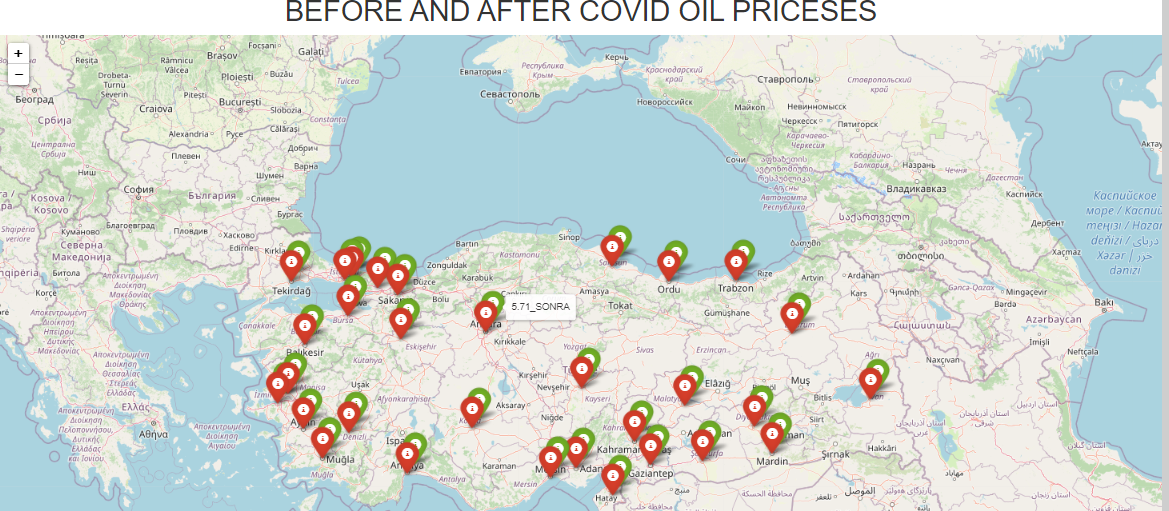

In [13]:
# Github Foilum Kütüphanesinin görselini desteklemediği için Screen Shot koyduk

from IPython.display import display, Image
display(Image(filename='Akar_yakıt_önce_sonra.png'))

* Bir şehre ait kovid öncesi ve sonrasını gösteren iki durum içinde fiyatları bu şekilde görebiliyoruz.

## Bokeh Kütüphanesi ile Akaryakıt Fiyatları Haritası

* Gerekli kütüphaneleri yüklüyoruz. Ardından işlemlere başlayacağız.

In [6]:
import pandas as pd
import numpy as np

from bokeh.models import *
from bokeh.plotting import *
from bokeh.io import *
from bokeh.tile_providers import *
from bokeh.palettes import *
from bokeh.transform import *
from bokeh.layouts import *
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df = pd.read_excel(r"C:\Users\LENOVO\Desktop\STAJ\Benzin_fiyat_buyuksehirler_before_after.xlsx")
df.head()

,Enlem,Boylam,Sehir,Fiyat_Once,Fiyat_Sonra
0,37.000000,35.321333,Adana,7.10,5.58
1,39.920770,32.854110,Ankara,7.10,5.71
2,36.884140,30.705630,Antalya,7.14,5.79
3,37.856041,27.841631,Aydın,7.07,5.74
4,39.648369,27.882610,Balıkesir,7.07,5.75


* Bokeh kullanırken birçok şey normalden daha fazla kod yazılarak yapılmaktadır.

* Haritanın eksen kısmının belirlenmesi, verilecek değerler, iç kısmının doldurulması vb.

* Sırasıyla bunları gerçekleştireceğiz.

* İlk önce enlem ve boylam değişkenlerinin isimlerini ingilizce karşılıklarına çeviriyoruz.

In [7]:
df.rename({"Boylam":"longitude","Enlem":"latitude"},axis=1,inplace=True)

import numpy as np

def wgs84_to_web_mercator(df, lon, lat):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    df["x"] = df[lon] * (k * np.pi/180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k
    return df

df=wgs84_to_web_mercator(df,'longitude','latitude')

df.head(3)

,latitude,longitude,Sehir,Fiyat_Once,Fiyat_Sonra,x,y
0,37.00000,35.321333,Adana,7.10,5.58,3.931953e+06,4.439107e+06
1,39.92077,32.854110,Ankara,7.10,5.71,3.657303e+06,4.854435e+06
2,36.88414,30.705630,Antalya,7.14,5.79,3.418135e+06,4.422970e+06


* Şimdi uzun bir kod bloğu yazacağız. Bu blokta yazdıklarımız kısaca şunlardan ibaret olacak; haritanın boyutunun ayarlanması, başlıklarının belirlenmesi, şekillerin renklerinin seçilmesi, veri için uygun ortamın harita üzerinde ayarlanması.

In [8]:
scale=7000
x=df['x']
y=df['y']

x_min=int(x.mean() - (scale * 150))
x_max=int(x.mean() + (scale * 150))
y_min=int(y.mean() - (scale * 150))
y_max=int(y.mean() + (scale * 150))

tile_provider=get_provider('CARTODBPOSITRON')

plot=figure(title='                2019 TEMMUZ AYI ORTALAMA AKARYAKIT FİYATLARI HARİTASI          ',
            match_aspect=True,tools='wheel_zoom,pan,reset,save',x_range=(x_min, x_max),y_range=(y_min, y_max),x_axis_type='mercator',y_axis_type='mercator')
plot.grid.visible=True

map=plot.add_tile(tile_provider)
map.level='underlay'

plot.xaxis.visible = False
plot.yaxis.visible=False

output_notebook()

def hex_map(plot,df, scale,leg_label='Hexbin Heatmap'):
    
    r,bins=plot.hexbin(x,y,size=scale*0,hover_color='pink',hover_alpha=0.9,legend_label=leg_label)
    hex_hover = HoverTool(tooltips=[('count','@c')],mode='mouse',point_policy='follow_mouse',renderers=[r])
    hex_hover.renderers.append(r)
    plot.tools.append(hex_hover)
  
    plot.legend.location = "top_right"
    plot.legend.click_policy="hide"
    
def bubble_map(plot,df,radius_col,lon,lat,scale,color='orange',leg_label='Bubble Map'):
    radius=[]
    for i in df[radius_col]:
        radius.append(i*scale)
  
    df['radius']=radius
    
    source=ColumnDataSource(df)
    c=plot.circle(x='x',y='y',color=color,source=source,size=1,fill_alpha=0.8,radius='radius',legend_label=leg_label,hover_color='red')
    
    
    tip_label='@'+radius_col
    lat_label='@'+lat
    lon_label='@'+lon
    
    circle_hover = HoverTool(tooltips=[('Sehir: ','@Sehir'),(radius_col,tip_label),('Lat:',lat_label),('Lon:',lon_label)],mode='mouse',point_policy='follow_mouse',renderers=[c])
    circle_hover.renderers.append(c)
    plot.tools.append(circle_hover)

    plot.legend.location = "top_right"
    plot.legend.click_policy="hide"
    
hex_map(plot=plot,
        df=df, 
        scale=scale,
        leg_label='')

bubble_map(plot=plot,
           df=df,
           radius_col='Fiyat_Once', 
           leg_label='Akaryakıt fiyatları Kovid Öncesi',
           lon='longitude',
           lat='latitude',
           scale=scale)



df1 = pd.read_excel(r"C:\Users\LENOVO\Desktop\STAJ\Benzin_fiyat_buyuksehirler_before_after.xlsx")
df1.head()

df1.rename({"Boylam":"longitude","Enlem":"latitude"},axis=1,inplace=True)

import numpy as np

def wgs84_to_web_mercator(df, lon, lat):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    df["x"] = df[lon] * (k * np.pi/180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k
    return df

df1=wgs84_to_web_mercator(df1,'longitude','latitude')

scale=7000
x=df['x']
y=df['y']



x_min=int(x.mean() - (scale * 150))
x_max=int(x.mean() + (scale * 150))
y_min=int(y.mean() - (scale * 150))
y_max=int(y.mean() + (scale * 150))

tile_provider=get_provider("CARTODBPOSITRON")

plot1=figure(title='                2020 MAYIS AYI ORTALAMA AKARYAKIT FİYATLARI HARİTASI          ',
             match_aspect=True,tools='wheel_zoom,pan,reset,save',x_range=(x_min, x_max),y_range=(y_min, y_max),x_axis_type='mercator',y_axis_type='mercator')
plot1.grid.visible=True

map=plot1.add_tile(tile_provider)
map.level='underlay'

plot1.xaxis.visible = False
plot1.yaxis.visible=False

output_notebook()


def hex_map1(plot,df, scale,leg_label='Hexbin Heatmap'):
    
    r,bins=plot.hexbin(x,y,size=scale*0,hover_color='pink',hover_alpha=0.9,legend_label=leg_label)
    hex_hover = HoverTool(tooltips=[('count','@c')],mode='mouse',point_policy='follow_mouse',renderers=[r])
    hex_hover.renderers.append(r)
    plot.tools.append(hex_hover)
  
    plot.legend.location = "top_right"
    plot.legend.click_policy="hide"

    
def bubble_map1(plot,df,radius_col,lon,lat,scale,color='black',leg_label='Bubble Map'):
    radius=[]
    for i in df[radius_col]:
        radius.append(i*scale)
  
    df['radius']=radius
    
    source=ColumnDataSource(df)
    c=plot.circle(x='x',y='y',color=color,source=source,size=1,fill_alpha=0.8,radius='radius',legend_label=leg_label,hover_color='purple')
    
    
    tip_label='@'+radius_col
    lat_label='@'+lat
    lon_label='@'+lon
    
    circle_hover = HoverTool(tooltips=[('Sehir: ','@Sehir'),(radius_col,tip_label),('Lat:',lat_label),('Lon:',lon_label)],mode='mouse',point_policy='follow_mouse',renderers=[c])
    circle_hover.renderers.append(c)
    plot.tools.append(circle_hover)

    plot.legend.location = "top_right"
    plot.legend.click_policy="hide"

    
    
hex_map1(plot=plot1,
        df=df1, 
        scale=scale,
        leg_label='')

bubble_map1(plot=plot1,
           df=df1,
           radius_col='Fiyat_Sonra', 
           leg_label='Akaryakıt fiyatları Kovid Sonrası',
           lon='longitude',
           lat='latitude',
           scale=scale)

Loading BokehJS ...

Loading BokehJS ...

* Haritamız aşşağıdaki gibidir. 

* Sol taraftaki haritada 2019 TEMMUZ ayına ait benzin fiyatlarının ortalama miktarı büyük şehirlere göre ayarlanmıştır.

* Sağ taraftaki haritada ise 2020 MAYIS ayına ait ortalama benzin fiyatlarını görebiliriz.

In [9]:
plot.legend.location = "top_right"
plot.legend.click_policy="hide"
show(row(plot,plot1))

## Github Bokeh görselini desteklemediği için bu şekilde yapıştırdık.

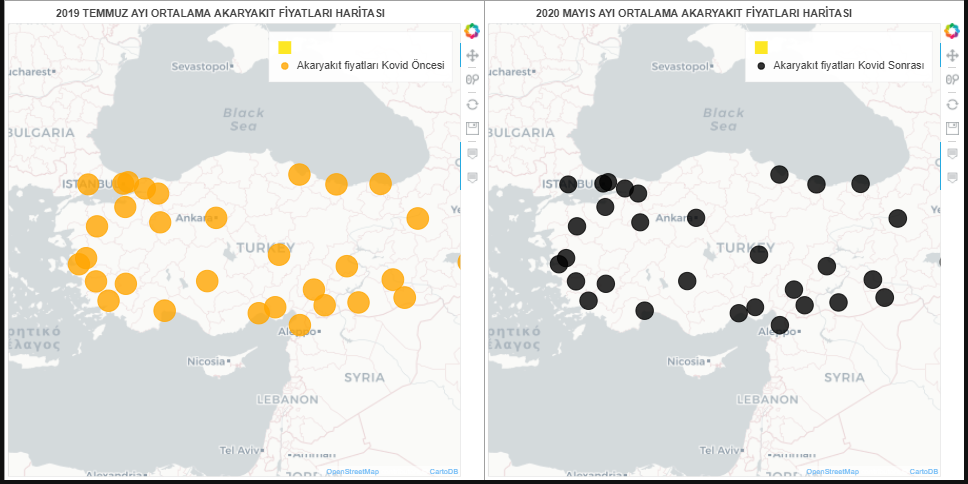

In [12]:
from IPython.display import display, Image
display(Image(filename='Bokeh_Map.png'))